# PREDICT FUTURE HOUSING PRICES IN CALIFORNIA
## Step-by-Step Data Science, Visualization, & Machine Learning 
### By: Vrishank Jannu

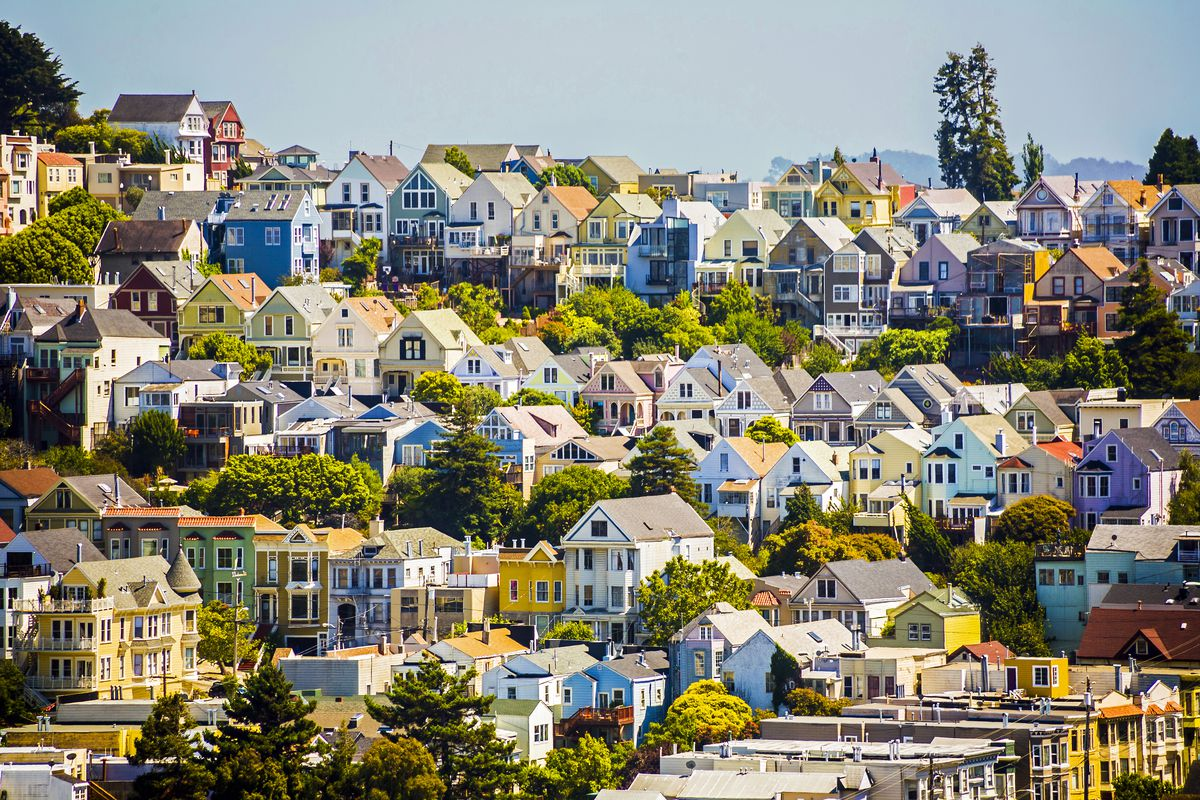

## **Project Goals:**
1) Accurately predict housing prices in California.\
2) Perform Exploratory Data Analysis and Data Visualization.\
3) Understand the process of developing a machine learning model.\
4) Gain a deep understanding of the data science life cycle.

## **Introduction:**
The housing market has remained a hot topic for decades as the demand for real estate continues to soar rapidly year-by-year. A healthy housing market is vital for not only residents but the entire economy. Businesses, organizations, and professionals from nearly every industry are looking for ways to visualize and accurately predict the future of housing prices. Recently, the housing market in California has dealt with escalating costs, and a growing number of residents and businesses are fleeing to other states and vicinities with lower housing prices. This notebook aims to accurately predict future housing prices in California. The data we will be using pertains to the houses found in a given California district and some summary statistics about them based on the 1990 census data.

In [12]:
# LOAD LIBRARIES AND SET UP
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geopandas as gpd
sns.set()

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore", ConvergenceWarning)

from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Understanding Our Data:

In [13]:
# READ DATA AND REPORT TOTAL ROWS AND COLUMNS
nRowsRead = None
df1 = pd.read_csv(r'C:\Users\15128\Downloads\archive\housing.csv', delimiter=',',nrows = nRowsRead)
df1.dataframeName = 'housing.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns.')

There are 20640 rows and 10 columns.


We can see from the data below that there is plenty of information for each data point. Each data point is not an individual house but instead a coordinate on the map with a precise longitude and latitude.

Information includes:
- Median Age
- Total Rooms
- Total Bedrooms
- Population
- Households
- Median Income
- Median House Value
- Ocean Proximity

In [14]:
# What does the data look like?
df1.head(10)
# outputs the first 10 rows of data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
5       413.0       193.0         4.0368            269700.0        NEAR BAY  
6      1094.0       514.0         3.6591            299200.0        NEAR BAY  
7      1157.0       647.0         3.1200            241400.0        NEAR BAY  
8      1206.0       595.0         2.0804            226700.0        NEAR BAY  
9      1551.0       714.0         3.6912            261100.0        NEAR BAY

In [15]:
# BASIC STATISTICS
df1.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

## **Exploratory Data Analysis:**

*Exploratory Data Analysis (EDA)* is the crucial process of using summary statistics and graphical representations to perform preliminary investigations on data in order to uncover patterns, detect anomalies, test hypotheses, and verify assumptions.

Our EDA process will be split into three steps:
- **Univariate** visualizations of each field in the raw dataset, with summary statistics.
- **Bivariate** visualizations that allow you to assess the relationship between each variable in the dataset and the target variable you’re looking at.
- **Multivariate** visualizations for mapping and understanding interactions between different fields in the data.

**Univariate Analysis:**\
First, let's take a look at the distribution of each individual variable. To do this we will generate a histogram using the `matplotlib.pyplot` module for each variable. We can see that the number of rooms, total bedrooms, population, households, median income, and median house value all appear to possess right-skewed or postitively skewed distributions in which majority of the values are clustered towards the left side of the distribution. On the other hand, the longitude, latitude, and housing median age appear to have bimodal and relatively even distributions.

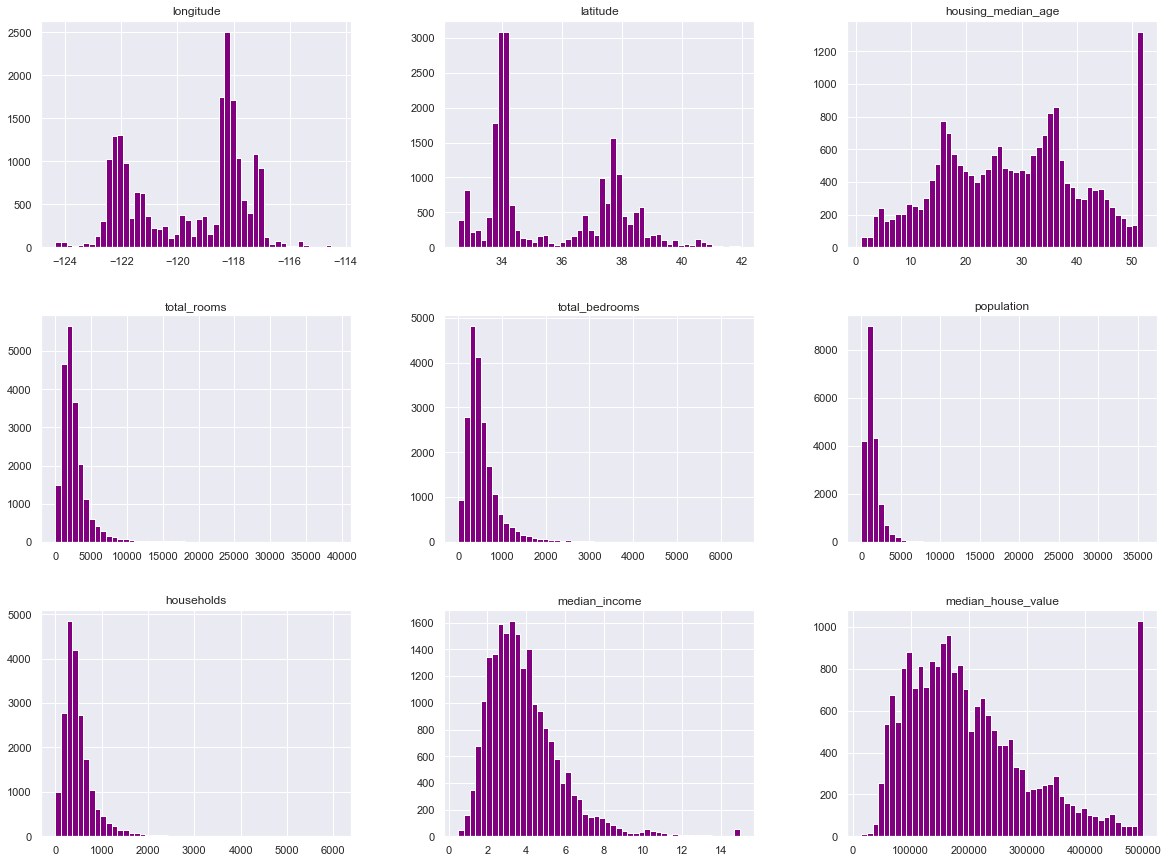

In [16]:
# UNIVARIATE ANALYSIS
import matplotlib.pyplot as plt
df1.hist(bins=50,figsize=(20,15), color='purple')
plt.show()

<AxesSubplot:title={'center':'Density Plot of Median House Value in California'}, xlabel='Price (Dollars)', ylabel='Density'>

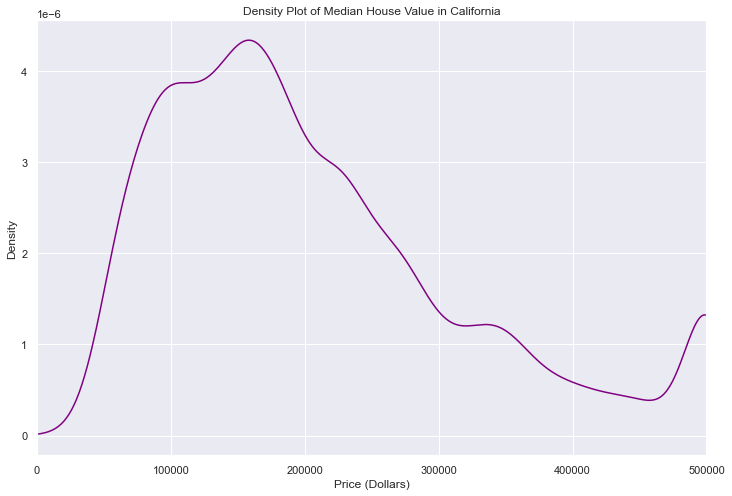

In [17]:
plt.figure(figsize=(12,8))
plt.title("Density Plot of Median House Value in California")
plt.xlabel("Price (Dollars)")
df1['median_house_value'].plot(kind='density', xlim = (0,500000), color = 'purple')

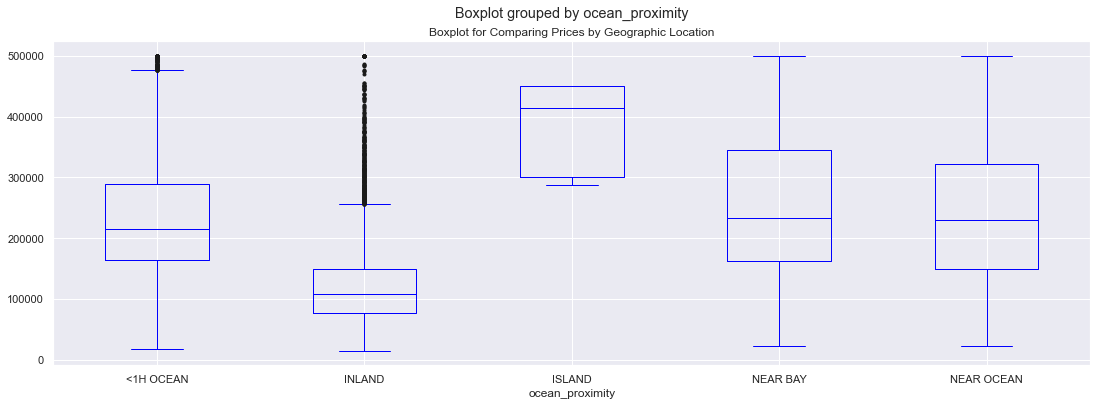

In [18]:
df1.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6), color = 'blue')
#set title
plt.title('Boxplot for Comparing Prices by Geographic Location')
plt.show()

**Bivariate Analysis:**

In Bivariate Analysis, there are two variables wherein the analysis is related to cause and the relationship between the two variables. Let's first check the correlation between different features. The closer the value is to 1, the higher the correlation is between those two variables. We will use the `seaborn` (sns) module to generate a heatmap. Notice that the relationship between the same two variables is 1 which forms a diagonal along the matrix.

For this analysis, we need to pay attention to the median house value in particular since our goal in this project is to accurately predict housing prices in California. Thus, we can see that median income has the highest correlation with the median house value compared to the other variables.

<AxesSubplot:>

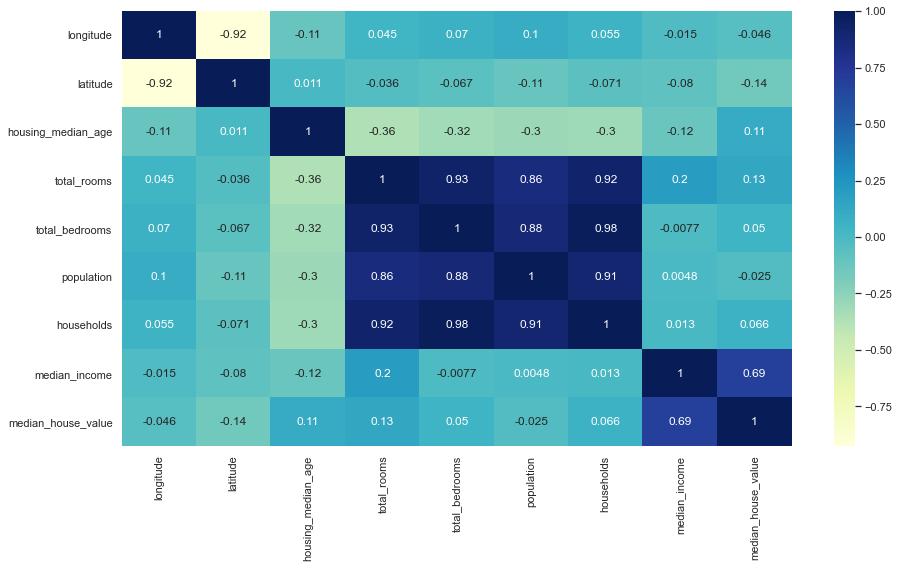

In [19]:
# BIVARIATE ANALYSIS
# CHECK CORRELATION BETWEEN DIFFERENT FEATURES
# GENERATE HEATMAP
attributes_corr = df1.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(attributes_corr, cmap ="YlGnBu", xticklabels = attributes_corr.columns, yticklabels = attributes_corr.columns,annot=True)

In [20]:
attributes_corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Above, we sorted the attributes by the highest correlation to the median house value. Now let's generate scatterplots of the top four features and their correlations with one another via the `sns.pairplot` function.

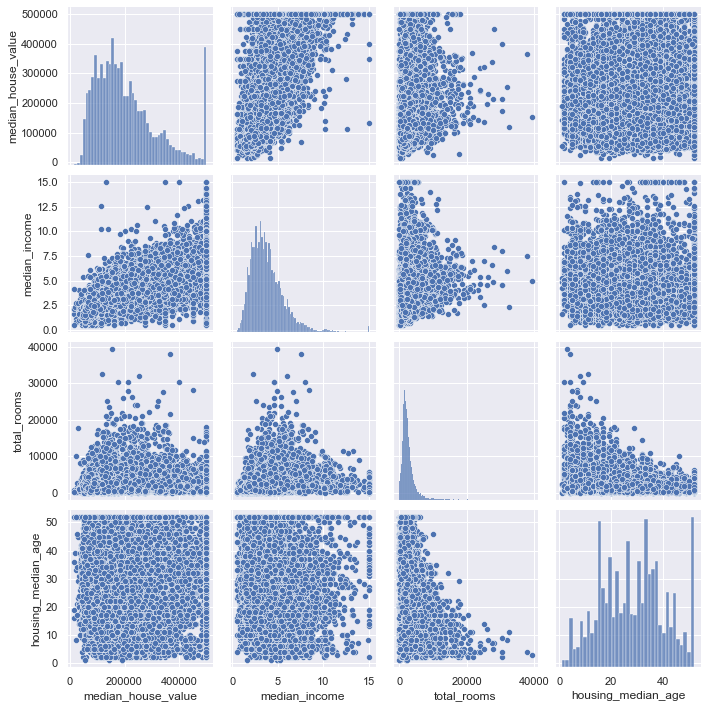

In [21]:
# VISUAL REPRESENTATION OF CORRELATIONS
attributes=["median_house_value","median_income","total_rooms","housing_median_age"] # TOP 4 FEATURES
sns.pairplot(df1[attributes])

We can take an additional step and view the density of the data points in the scatterplots by importing the `scatter_matrix` from pandas. Notice how the two variables with the highest correlation *(Median House Value and Median Income)* are closer to linearity than the rest. We can clearly see that as the median income increases, the median house value also increases.

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

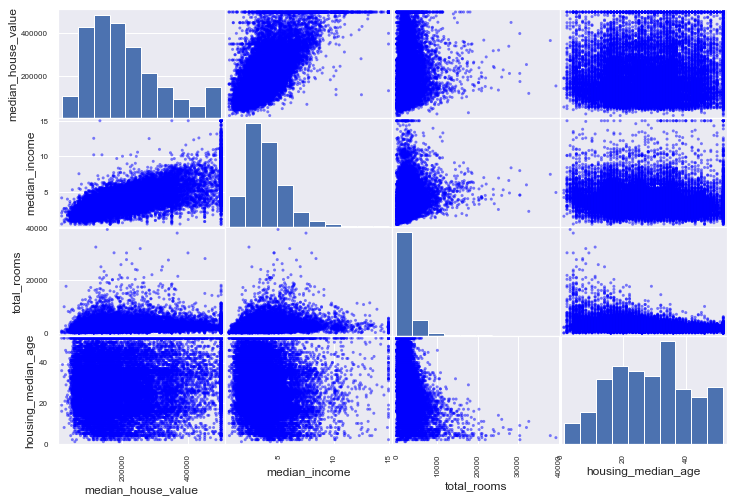

In [22]:
# View Density of the Scatter Plots better with a Scatter Matrix from Pandas
from pandas.plotting import scatter_matrix
scatter_matrix(df1[attributes],figsize=(12,8), color = 'blue')

Now, let's identify more trends in our median income correlation with median house value which we have discovered to have the strongest correlation in comparison to the other variables. From the `sns.relplot` relationship plot below, we can see that the areas with the lowest median house value are typically inland and farthest from the coastline whereas areas within an hour from the ocean or near the San Francisco Bay area are typically the most expensive areas to purchase real estate. This relationship plot is an example of multivariate visualization.

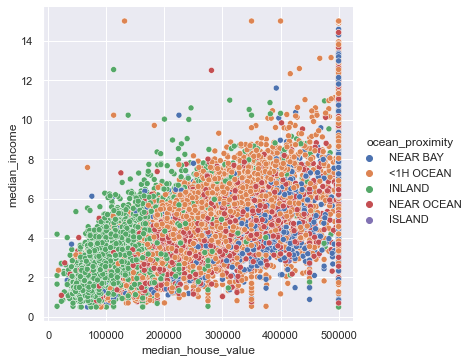

In [23]:
sns.relplot(x = "median_house_value",y="median_income",hue="ocean_proximity",data=df1)
# Median House Value has the strongest correlation with Median Income.

`train_test_split` is a function in sklearn model selection for splitting data arrays into two subsets: for training data and for testing data. With this function, you don't need to divide the dataset manually. By default, sklearn train_test_split will make random partitions for the two subsets.

The test set is a sample of data used to provide an unbiased evaluation of a final model fit on the training dataset. Creating a test set is crucial for evaluating the performance of the machine learning model that we plan to implement soon in this notebook.

In [24]:
# CREATE A TEST SET
"""
Creating shuffled testset with constant values in training and updated dataset values going to 
test set in case dataset is updated, this done via hashlib
"""
import hashlib
import numpy as np

def test_set_check(identifier,test_ratio,hash):
    return hash(np.int64(identifier)).digest()[-1]<256*test_ratio
    
def split_train_test(data,test_ratio,id_column,hash=hashlib.md5):
    ids=data[id_column]
    in_test_set=ids.apply(lambda id_:test_set_check(id_,test_ratio,hash))
    return data.loc[~in_test_set],data.loc[in_test_set]

<AxesSubplot:>

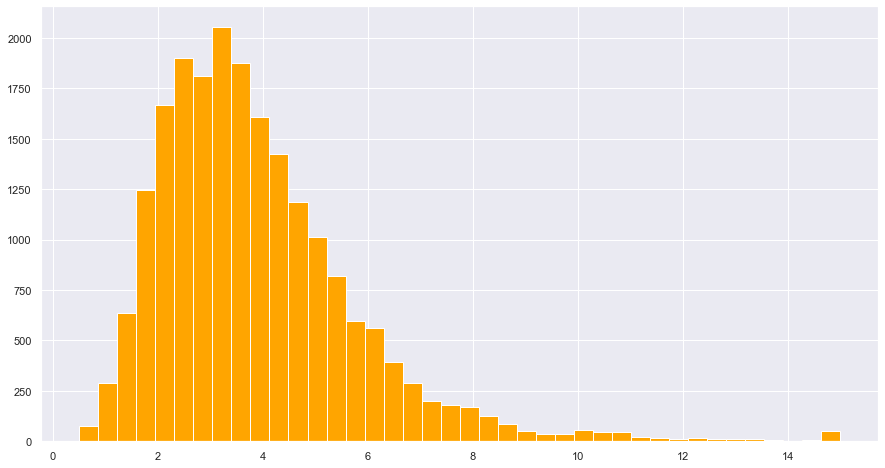

In [25]:
df1["median_income"].hist(bins=40, color = 'orange')

In [26]:
df1["income_cat"]=np.ceil(df1["median_income"]/1.5)
df1["income_cat"]=df1["income_cat"].apply(lambda x: 5 if x>5 else x)

<AxesSubplot:>

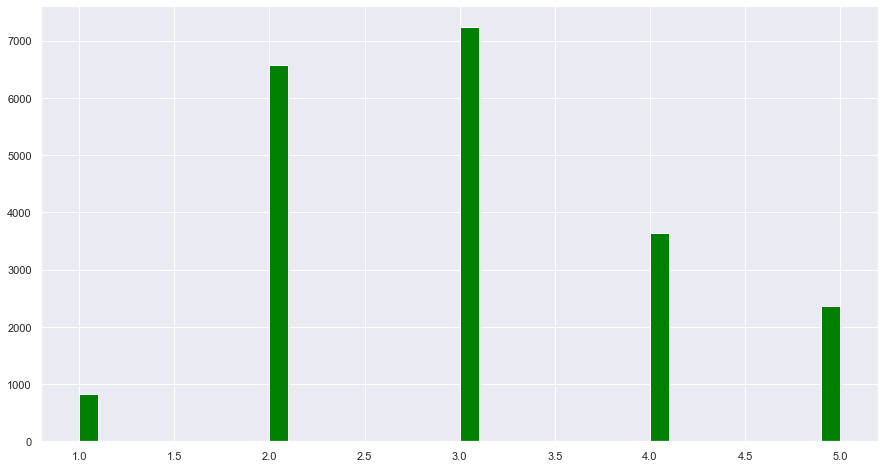

In [27]:
df1["income_cat"].hist(bins=40, color = 'green')

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit

split= StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_idx,test_idx in split.split(df1,df1["income_cat"]):
    strat_train_set=df1.loc[train_idx]
    strat_test_set=df1.loc[test_idx]

In [29]:
a= (strat_train_set,strat_test_set)
for i in a:
    i.drop(["income_cat"],axis=1,inplace=True)

**Multivariate Analysis: Geospatial Data Visualization**

This is where things become even more exciting and insightful. Plotting our data based on location and spatiality will help us understand and predict geographical patterns. Before we begin our visualizations and multivariate analysis, let's take a look at the maps we will be analyzing. The map to the left is the state of California showing the major highways and cities. The middle map is of the city of Los Angeles and the surrounding area. The rightmost map is the San Francisco Bay Area.

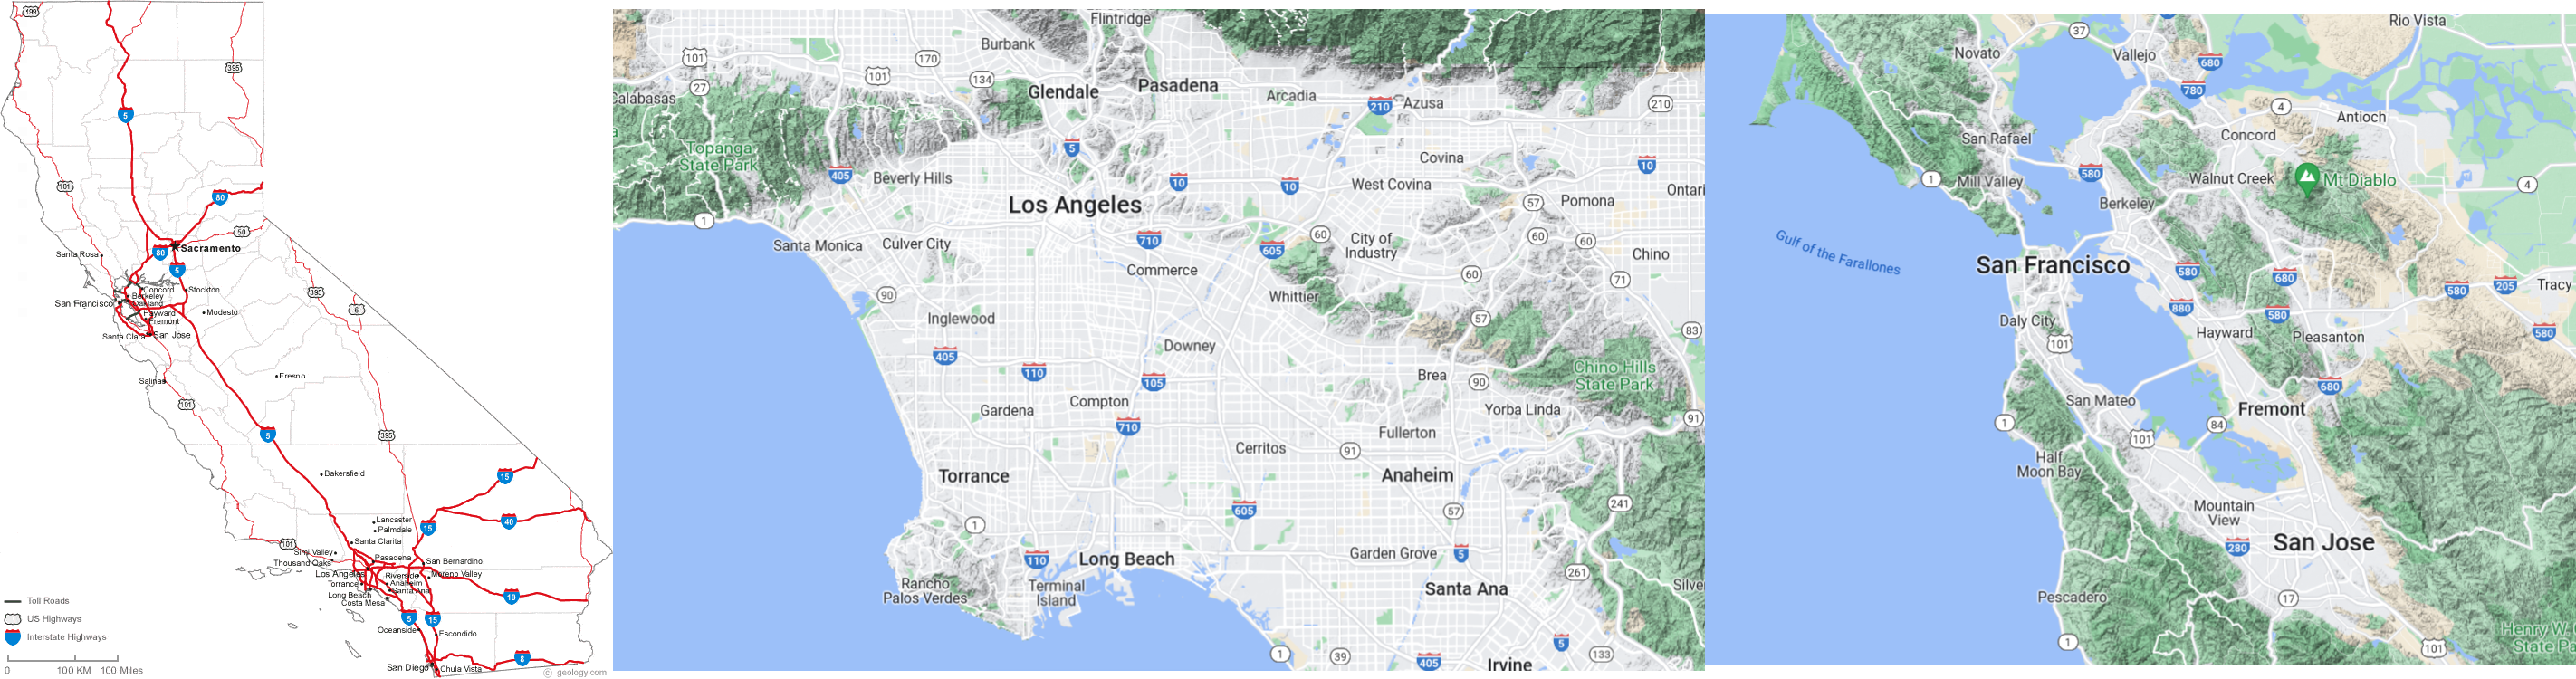

In [30]:
# GEOSPATIAL DATA VISUALIZATION
df1 = strat_test_set.copy()

Let's first generate a scatterplot that simply shows where our data is located and where most of the data points are clustered at. Notice how majority of our data points are clustered around two areas: **San Francisco Bay Area** *(latitude of 37 degrees and longitude of -122 degrees)* and the **Greater Los Angeles Region** *(latitude of 34 degrees and longitude of -118 degrees)*. Additionally, there is a smaller cluster just south of the Greater Los Angeles Region which represents the **San Diego Metropolitan Area**.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

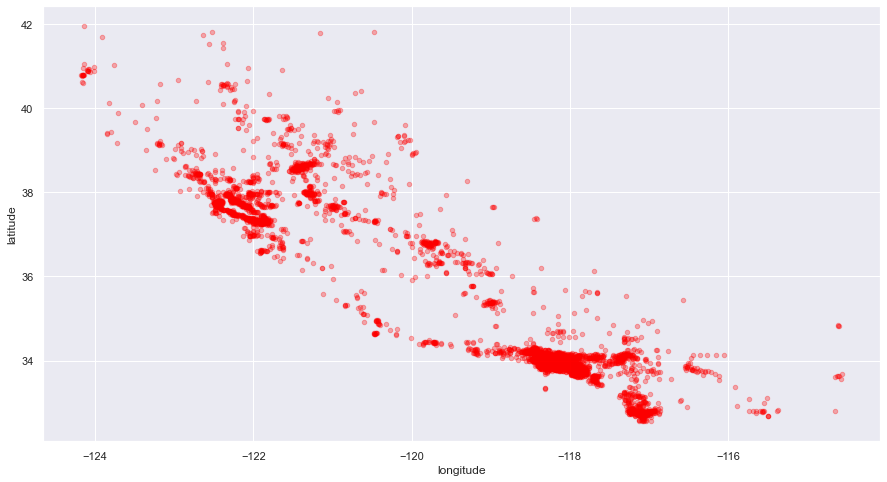

In [31]:
df1.plot(kind="scatter",x="longitude",y="latitude",alpha=0.3, color = 'red')

Next, let's see how the **population** influences the **median house value** in the same scatter plot. 

We can observe from the scatterplot that the three largest clusters (SF Bay Area, Greater LA, and San Diego Metro) all possess some of the highest median house values due to the population being much larger in those three clusters. Population clearly does have an influence on the median house value.

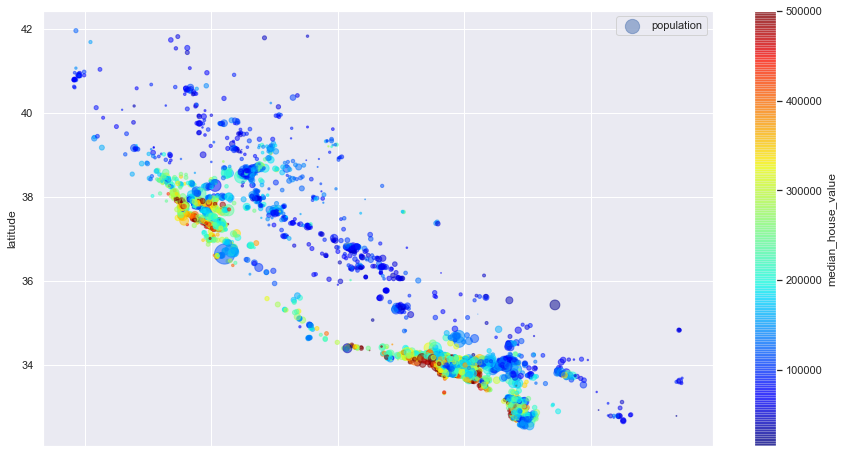

In [32]:
df1.plot(kind="scatter",x="longitude",y="latitude",alpha=0.5,
         s=df1["population"]/70,label="population",
         c="median_house_value",cmap=plt.get_cmap("jet"),
         colorbar=True)
plt.legend()

Here is a zoomed-in look on the Greater Los Angeles Region. Through observing the size and color of the dots, we can see that the more populated areas tend to have greater median house values than areas with much lower populations. This trend however isn't 100% consistent and not as apparent as there are numerous small dots on the map (representing small populations) with some of the largest median house values in the region.

(-119.0, -117.75, 33.5, 34.5)

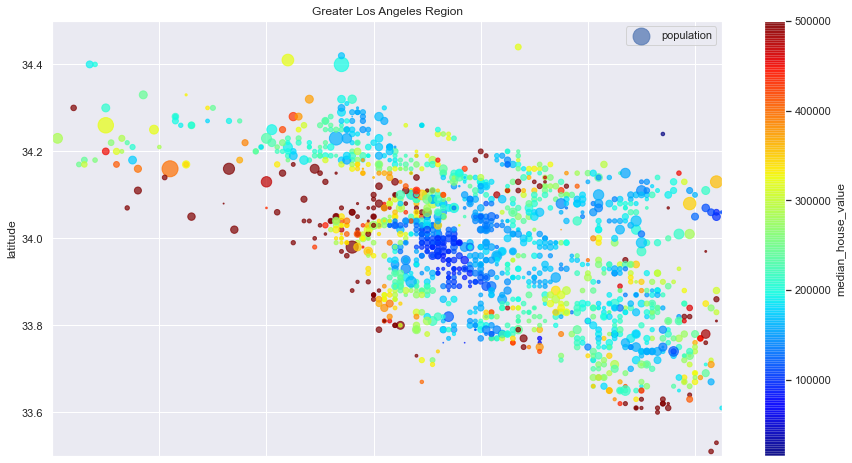

In [33]:
df1.plot(kind="scatter",x="longitude",y="latitude",alpha=0.7,
         s=df1["population"]/50,label="population",
         c="median_house_value",cmap=plt.get_cmap("jet"), title='Greater Los Angeles Region',
         colorbar=True)
plt.legend()
plt.axis([-119, -117.75, 33.5, 34.5])

In the San Francisco Bay Area, we can see that the West side of the Bay where the population is relatively higher compared to the East side has higher median house values. This trend once again, however, is not 100% consistent.

(-122.75, -121.75, 37.0, 38.2)

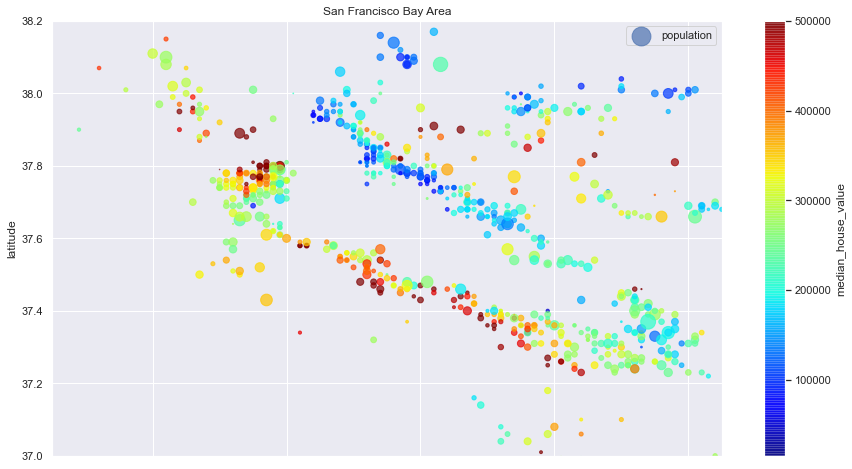

In [34]:
df1.plot(kind="scatter",x="longitude",y="latitude",alpha=0.7,
         s=df1["population"]/40,label="population",
         c="median_house_value",cmap=plt.get_cmap("jet"), title = "San Francisco Bay Area",
         colorbar=True)
plt.legend()
plt.axis([-122.75, -121.75, 37, 38.2])

From our bivariate analysis, we observed from our correlation heatmap that the median income has the most influence on the median house value out of all of the features. Let's now visualize this correlation in the same geospatial scatterplot.

The larger the dots are, the larger the median income is in that specific area. Notice how the colors change from dark purple to much lighter colors when the dots are much larger. This indicates a general trend that the higher the median income is in a specific area, the greater the median house value is.

We can clearly see that the median income is significantly larger in the three clusters (SF Bay, Greater LA, and San Diego Metro) than in the rest of the map. These three cluster regions are home to a plethora of businesses, organizations, and economic opportunities, all of which have a heavy influence on the median income itself.

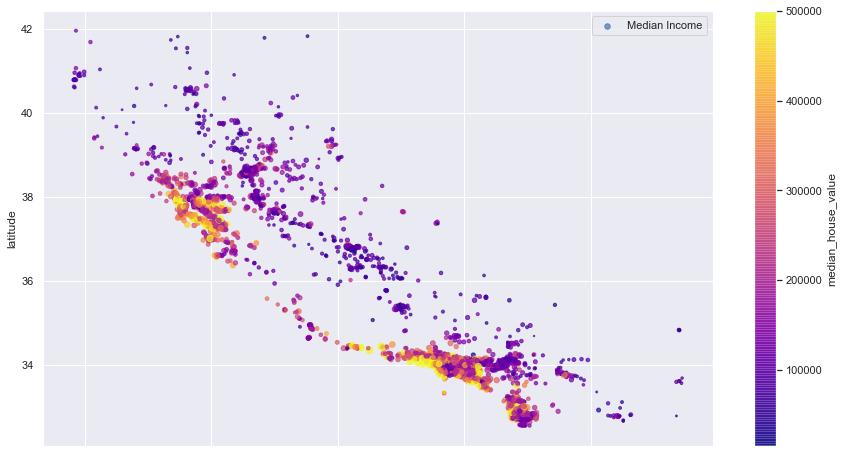

In [35]:
df1.plot(kind="scatter",x="longitude",y="latitude",alpha=0.7,
         s=df1["median_income"]*4,label="Median Income",
         c="median_house_value",cmap=plt.get_cmap("plasma"),
         colorbar=True)
plt.legend()

Here is a closer look at the spread of median incomes and its influence on the median house values in the Bay Area. We can observe the wealth inequality between the West and East sides of the bay. To put this into context, the West side is home to a plethora of big tech companies like Google, Apple, and Facebook (just to name a few) which make up the globally-recognized "Silicon Valley". As a result, residents on this side of the Bay possess significantly larger incomes compared to the East side. As a result, housing prices continue to soar in these areas even to this day.

Performing these in-depth visualizations allows us to contextualize and make sense out of our data and especially understand how this data applies to the real world today.

(-122.75, -121.5, 37.0, 38.2)

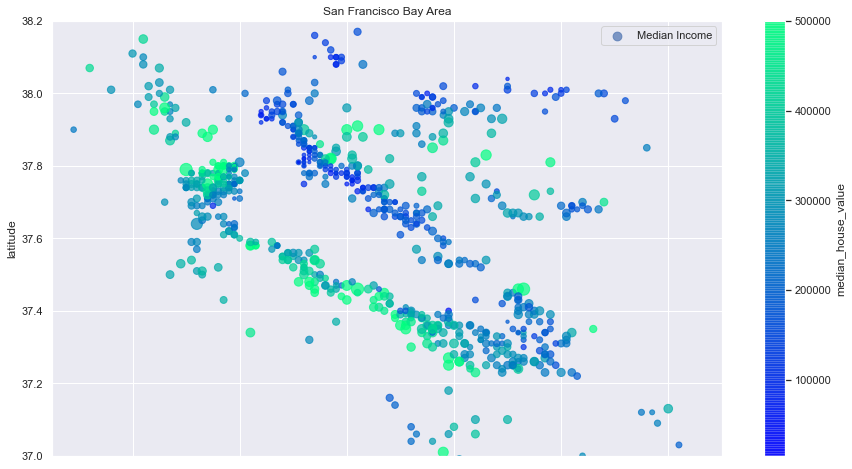

In [36]:
df1.plot(kind="scatter",x="longitude",y="latitude",alpha=0.7,
         s=df1["median_income"]*10,label="Median Income",
         c="median_house_value",cmap=plt.get_cmap("winter"), title="San Francisco Bay Area",
         colorbar=True)
plt.legend()
plt.axis([-122.75, -121.5, 37, 38.2])

Here is an in-depth look at the Greater LA Region. We can see that areas like the Beverley Hills and the coastal vicinities have much higher median house values whereas the inner city and suburbs like Compton have much lower median house values. 

We notice a very consistent trend that the lighter dots are much larger in size than the darker dots. This means that the median incomes are much higher in areas with high median house values or in other words, more expensive housing areas. These geospatial visualizations are further evidence that median income has a very strong correlation with median house value.

(-119.0, -117.75, 33.5, 34.5)

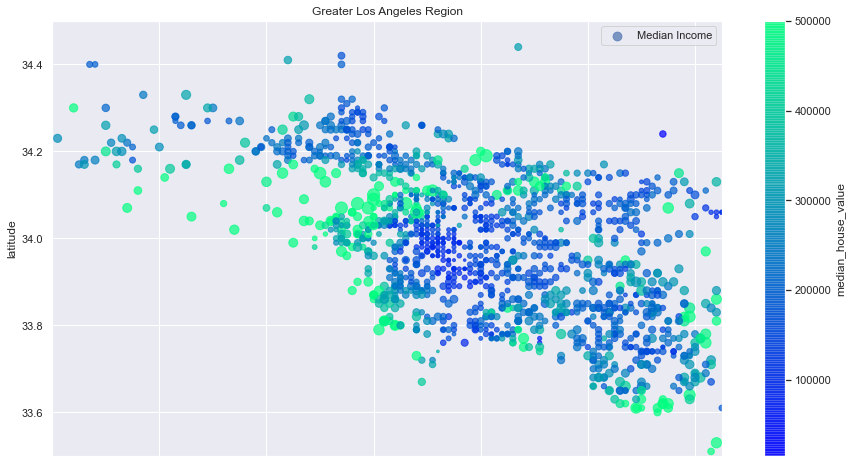

In [37]:
df1.plot(kind="scatter",x="longitude",y="latitude",alpha=0.7,
         s=df1["median_income"]*10,label="Median Income",
         c="median_house_value",cmap=plt.get_cmap("winter"), title="Greater Los Angeles Region",
         colorbar=True)
plt.legend()
plt.axis([-119, -117.75, 33.5, 34.5])

## Feature Engineering:

Feature engineering is a machine learning technique that leverages data to create new variables that aren’t in the training set with the goal of simplifying and speeding up data transformations while also enhancing model accuracy. 

In [38]:
# FEATURE ENGINEERING
df1['avgRooms']=df1['total_rooms']/df1['households']
df1['avgBedrooms']= df1['total_bedrooms']/df1['households']
df1['pop_per_household']= df1['population']/df1['households']

(-119.0, -117.75, 33.5, 34.5)

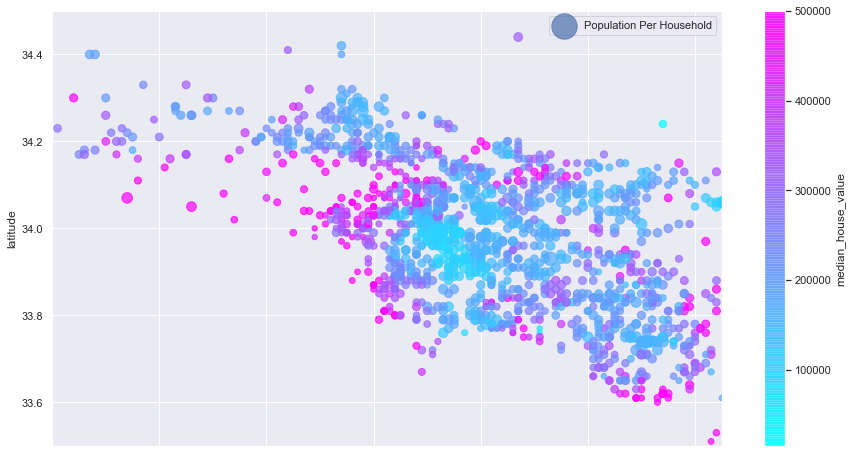

In [39]:
df1.plot(kind="scatter",x="longitude",y="latitude",alpha=0.7,
         s=df1["pop_per_household"]*20,label="Population Per Household",
         c="median_house_value",cmap=plt.get_cmap("cool"),
         colorbar=True)
plt.legend()
plt.axis([-119, -117.75, 33.5, 34.5])

In [40]:
df1["income_cat"] = pd.cut(df1["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5])
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [41]:
housing_num = housing.drop('ocean_proximity',axis= 1)

In [42]:
housing_num.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   

       population  households  median_income  
17606       710.0       339.0         2.7042  
18632       306.0       113.0         6.4214  
14650       936.0       462.0         2.8621  
3230       1460.0       353.0         1.8839  
3555       4459.0      1463.0         3.0347

## Model Setup:

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [44]:
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('std_scaler', StandardScaler()),
 ])

In [45]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

In [46]:
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OneHotEncoder(), cat_attribs),
 ])

In [47]:
housing_prepared = full_pipeline.fit_transform(housing)

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [50]:
x_test = strat_test_set.drop('median_house_value',axis = 1)

y_test = strat_test_set['median_house_value']

x_test_transformed = full_pipeline.transform(x_test)

pred = lin_reg.predict(x_test_transformed)

## Model and Predict:

**XGBoost** is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks. However, when it comes to small-to-medium structured/tabular data, decision tree based algorithms are considered best-in-class right now.

Decision trees, in their simplest form, are easy-to-visualize and fairly interpretable algorithms but building intuition for the next-generation of tree-based algorithms can be a bit tricky. See below for a simple analogy to better understand the evolution of tree-based algorithms.

Imagine that you are a hiring manager interviewing several candidates with excellent qualifications. Each step of the evolution of tree-based algorithms can be viewed as a version of the interview process.

1) **Decision Tree**: Every hiring manager has a set of criteria such as education level, number of years of experience, interview performance. A decision tree is analogous to a hiring manager interviewing candidates based on his or her own criteria.\
2) **Bagging**: Now imagine instead of a single interviewer, now there is an interview panel where each interviewer has a vote. Bagging or bootstrap aggregating involves combining inputs from all interviewers for the final decision through a democratic voting process.\
3) **Random Forest**: It is a bagging-based algorithm with a key difference wherein only a subset of features is selected at random. In other words, every interviewer will only test the interviewee on certain randomly selected qualifications (e.g. a technical interview for testing programming skills and a behavioral interview for evaluating non-technical skills).\
4) **Boosting**: This is an alternative approach where each interviewer alters the evaluation criteria based on feedback from the previous interviewer. This ‘boosts’ the efficiency of the interview process by deploying a more dynamic evaluation process.\
5) **Gradient Boosting**: A special case of boosting where errors are minimized by gradient descent algorithm e.g. the strategy consulting firms leverage by using case interviews to weed out less qualified candidates.\
6) **XGBoost**: Think of XGBoost as gradient boosting on ‘steroids’. It is a perfect combination of software and hardware optimization techniques to yield superior results using less computing resources in the shortest amount of time.

For our model, we will use *Extreme Gradient Boosting* to predict housing prices in California.

In [51]:
import xgboost as xgb

In [52]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 1,eta=0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 2200)

xg_reg.fit(housing_prepared, housing_labels)

[10:42:51] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eta=0.3, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=2200, n_jobs=8,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=10, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1, ...)

We can check the accuracy of our model by using the `.score()` function call. We can see that our model is nearly 85% accurate in predicting housing prices in California! 

In [53]:
xg_reg.score(x_test_transformed, y_test)

0.8494269298900725

**Cross Validation** is a very useful technique for assessing the effectiveness of your model, particularly in cases where you need to mitigate overfitting. It is also of use in determining the hyper parameters of your model, in the sense that which parameters will result in lowest test error.

In [54]:
from sklearn.model_selection import cross_val_score

#tree_scores = cross_val_score(tree_reg, X_test, y_test, scoring="neg_mean_squared_error", cv=10)

Xg_RMSE_Score = cross_val_score(xg_reg, housing_prepared, housing_labels,scoring = "neg_mean_squared_error", cv= 10)

[10:43:10] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[10:43:29] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[10:43:49] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[10:44:10] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[10:44:29] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[10:44:49] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[10:45:09] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objecti

In [55]:
XG_RMSE_SCORES = np.sqrt(-Xg_RMSE_Score)
XG_RMSE_SCORES

array([45086.57619751, 44841.61310678, 45547.53023671, 46460.09901704,
       46152.59439863, 50010.46013409, 44944.55459047, 47452.43883074,
       47169.5237153 , 46583.27715073])